Importing the libraries I will need to use.

In [1]:
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sqlite3
#import beautifulsoup4 as bs


Importing the data from the datasets into a Data Frame.

DCComicsdf is for the DC Comic Heroes dataset.

Marveldf is for the Marvel Comic Heroes dataset.

SuperHeroes_datadf is the dataset that has the attributes the heroes possess.

    Intelligence
    Strength
    Speed
    Durability
    Raw Power Score	
    Combat Ability

superheroesdf is the dataset that has the powers that each hero possess.

In [2]:
DCComicsdf = pd.read_csv("data/dc-wikia-data_updated.csv", encoding='utf-8')
MarvelComicsdf = pd.read_csv("data/marvel-wikia-data_update.csv", encoding='utf-8')
Superheroes_datadf = pd.read_csv("data/superheroes_data.csv", encoding='utf-8')
superherosdf = pd.read_csv("data/superheroes_updated.csv", encoding='utf-8')
print(DCComicsdf.head())
print(MarvelComicsdf.head())
print(Superheroes_datadf.head())
print(superherosdf.head())

   id             name       full-name         identity            align  \
0   1           batman   (bruce wayne)  secret identity  good characters   
1   2         superman    (clark kent)  secret identity  good characters   
2   3    green lantern    (hal jordan)  secret identity  good characters   
3   4     james gordon     (new earth)  public identity  good characters   
4   5  richard grayson     (new earth)  secret identity  good characters   

          eye        hair              sex              alive appearances  \
0   blue eyes  black hair  male characters  living characters        3093   
1   blue eyes  black hair  male characters  living characters        2496   
2  brown eyes  brown hair  male characters  living characters        1565   
3  brown eyes  white hair  male characters  living characters        1316   
4   blue eyes  black hair  male characters  living characters        1237   

  first appearance    year  
0        1939, may  1939.0  
1    1986, october  19

Getting the Column Names for DC from the CSV

In [3]:
column_names = DCComicsdf.columns.tolist()
print("Column Names:", column_names)

Column Names: ['id', 'name', 'full-name', 'identity', 'align', 'eye', 'hair', 'sex', 'alive', 'appearances', 'first appearance', 'year']


Getting the Column Names for Marvel from the CSV

In [4]:
column_names = MarvelComicsdf.columns.tolist()
print("Column Names:", column_names)

Column Names: ['id', 'name', 'full-name', 'identity', 'align', 'eye', 'hair', 'sex', 'alive', 'appearances', 'first appearance', 'year']


Getting the Column Names for the SuperHero Ability stats

In [ ]:
column_names = Superheroes_datadf.columns.tolist()
print("Column Names:", column_names)


id                     0
name                   0
full-name              6
identity            3773
align               2813
eye                 9768
hair                4266
sex                  841
alive                  5
appearances         1098
first appearance     817
year                 817
dtype: int64

Getting the Column Names for the SuperHeroes Power List

In [5]:
column_names = superherosdf.columns.tolist()
print("Column Names:", column_names)

Column Names: ['id', 'Alignment', 'Alter_Egos', 'Base', 'Character', 'Class_value', 'Collections', 'Combat', 'Creator', 'Durability', 'Equipment', 'Eye_color', 'Formerly', 'Full_name', 'Gender', 'Hair_color', 'Height', 'IQ', 'Intelligence', 'Leader', 'Level', 'Member', 'Name', 'Occupation', 'Omnipotent', 'Omnipresent', 'Omniscient', 'Place_of_birth', 'Power', 'Relatives', 'Species', 'Speed', 'Speed_velocity', 'Strength', 'Strength_force', 'Super_powers', 'Tier', 'Universe', 'Weight', 'History']


Testing out Filtering the SuperHero Powers CSV as I only want to see DC and Marvel publishers

In [6]:
filteredDC_df = superherosdf[superherosdf['Creator'] == 'DC Comics']
print("Filtered DC Comics DataFrame:\n", filteredDC_df)

filteredMarvel_df = superherosdf[superherosdf['Creator'] == 'Marvel Comics']
print("Filtered Marvel Comics DataFrame:\n", filteredMarvel_df)

Filtered DC Comics DataFrame:
            id Alignment                                         Alter_Egos  \
3        27.0      Good                                                NaN   
4        28.0      Good                                                NaN   
9        58.0      Good                                                NaN   
10       59.0      Good                                                NaN   
11       60.0      Good                                                NaN   
...       ...       ...                                                ...   
9454  28402.0         -  Anti-Monitor,Anti-Monitor,Anti-Monitor,Anti-Mo...   
9455  28404.0      Good                                                NaN   
9456  28405.0       NaN                                        Doctor Fate   
9457  28406.0      Good                                                NaN   
9458  28408.0      Good                                                NaN   

                   Base       Ch

Creating the SQLite Tables for each CSV File.

In [7]:
# Create SQLite database and tables
conn = sqlite3.connect("Hero.db")
cursor = conn.cursor()

# Create tables DC_data
cursor.execute("""
CREATE TABLE IF NOT EXISTS DCHeroes (
    id TEXT PRIMARY KEY,
    name TEXT NOT NULL,
    identity TEXT NOT NULL, 
    align TEXT NOT NULL,
    eye TEXT NOT NULL,
    hair TEXT NOT NULL,
    sex TEXT NOT NULL,
    alive TEXT NOT NULL,
    appearances TEXT NOT NULL,
    first_appearance TEXT NOT NULL,
    year TEXT NOT NULL
);
""")

# Create tables Marvel_data
cursor.execute("""
CREATE TABLE IF NOT EXISTS MarvelHeroes (
    id TEXT PRIMARY KEY,
    name TEXT NOT NULL,
    identity TEXT NOT NULL, 
    align TEXT NOT NULL,
    eye TEXT NOT NULL,
    hair TEXT NOT NULL,
    sex TEXT NOT NULL,
    alive TEXT NOT NULL,
    appearances TEXT NOT NULL,
    first_appearance TEXT NOT NULL,
    year TEXT NOT NULL
);
""")
# Create tables SuperHeroes_data
cursor.execute("""
CREATE TABLE IF NOT EXISTS SuperHeroes (
    id TEXT PRIMARY KEY,
    name TEXT NOT NULL,
    intelligence TEXT NOT NULL,
    strength TEXT NOT NULL,
    speed TEXT NOT NULL,
    durability TEXT NOT NULL,
    power TEXT NOT NULL,
    combat TEXT NOT NULL,
    full_name TEXT NOT NULL,
    alter_egos TEXT NOT NULL, 
    aliases TEXT NOT NULL,
    place_of_birth TEXT NOT NULL,
    first_appearance TEXT NOT NULL,
    publisher TEXT NOT NULL,
    alignment TEXT NOT NULL,
    gender TEXT NOT NULL,
    race TEXT NOT NULL,
    height TEXT NOT NULL,
    weight TEXT NOT NULL,
    eye_color TEXT NOT NULL,
    hair_color TEXT NOT NULL,
    occupation TEXT NOT NULL,
    base TEXT NOT NULL,
    group_affiliation TEXT NOT NULL, 
    relatives TEXT NOT NULL,
    url TEXT NOT NULL
);
""")
# Create tables SuperHeroesPowers_data
cursor.execute("""
CREATE TABLE IF NOT EXISTS SuperHeroesPowers (
    id TEXT PRIMARY KEY,
    Creator TEXT NOT NULL,
    Durability TEXT NOT NULL, 
    Equipment TEXT NOT NULL, 
    Eye_color TEXT NOT NULL,
    Gender TEXT NOT NULL,
    Hair_color TEXT NOT NULL,
    IQ TEXT NOT NULL, 
    Intelligence TEXT NOT NULL, 
    Name TEXT NOT NULL,
    Occupation TEXT NOT NULL,
    Power TEXT NOT NULL,
    Relatives TEXT NOT NULL,
    Speed TEXT NOT NULL, 
    Strength TEXT NOT NULL, 
    Super_powers TEXT NOT NULL,
    Weight TEXT NOT NULL
);
""")
# Insert data into tables
DCComicsdf.to_sql("DCHeroes", conn, if_exists="replace", index=False)
MarvelComicsdf.to_sql("MarvelHeroes", conn, if_exists="replace", index=False)
Superheroes_datadf.to_sql("SuperHeroes", conn, if_exists="replace", index=False)
filtered_powers_df = superherosdf[
    (superherosdf['Creator'] == 'DC Comics') | (superherosdf['Creator'] == 'Marvel Comics')
]
filtered_powers_df.to_sql("SuperHeroesPowers", conn, if_exists="replace", index=False)

# Verify data was inserted
print("DC Heroes Table:\n")
print(pd.read_sql_query("SELECT * FROM DCHeroes", conn))

print("\Marvel Heroes Table:\n")
print(pd.read_sql_query("SELECT * FROM MarvelHeroes", conn))


print("Super Heroes Table:\n")
print(pd.read_sql_query("SELECT * FROM SuperHeroes", conn))

print("\Super Heroes Powers Table:\n")
print(pd.read_sql_query("SELECT * FROM SuperHeroesPowers", conn))


<>:104: SyntaxWarning: invalid escape sequence '\M'
<>:111: SyntaxWarning: invalid escape sequence '\S'
<>:104: SyntaxWarning: invalid escape sequence '\M'
<>:111: SyntaxWarning: invalid escape sequence '\S'
C:\Users\charl\AppData\Local\Temp\ipykernel_24544\1531654090.py:104: SyntaxWarning: invalid escape sequence '\M'
  print("\Marvel Heroes Table:\n")
C:\Users\charl\AppData\Local\Temp\ipykernel_24544\1531654090.py:111: SyntaxWarning: invalid escape sequence '\S'
  print("\Super Heroes Powers Table:\n")


DC Heroes Table:

        id              name       full-name         identity  \
0        1            batman   (bruce wayne)  secret identity   
1        2          superman    (clark kent)  secret identity   
2        3     green lantern    (hal jordan)  secret identity   
3        4      james gordon     (new earth)  public identity   
4        5   richard grayson     (new earth)  secret identity   
...    ...               ...             ...              ...   
6891  6892       nadine west     (new earth)  public identity   
6892  6893    warren harding     (new earth)  public identity   
6893  6894  william harrison     (new earth)  public identity   
6894  6895  william mckinley     (new earth)  public identity   
6895  6896            mookie     (new earth)  public identity   

                align         eye        hair                sex  \
0     good characters   blue eyes  black hair    male characters   
1     good characters   blue eyes  black hair    male characters 

Export SuperHeroesPowers table to CSV for more managable file size.  Original file was too large to upload to GitHub

In [8]:
import csv

conn = sqlite3.connect('Hero.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM SuperHeroesPowers")
rows = cursor.fetchall()

# Export the SuperHeroesPowers table to CSV with headers
with open('data\\SuperHeroes_Updated.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    # Write headers
    writer.writerow([i[0] for i in cursor.description])
    # Write the data rows
    writer.writerows(rows)
conn.close()

Dealing with the Null Values in the Datasets

In [9]:
import pandas as pd

# Remove rows with any null values from each CSV and save to new files
# DC Comics
dc_df = pd.read_csv("data/dc-wikia-data_updated.csv", encoding='utf-8')
dc_df_clean = dc_df.dropna()
dc_df_clean.to_csv("data/dc-wikia-data_no_nulls.csv", index=False, encoding='utf-8')

# Marvel Comics
marvel_df = pd.read_csv("data/marvel-wikia-data_update.csv", encoding='utf-8')
marvel_df_clean = marvel_df.dropna()
marvel_df_clean.to_csv("data/marvel-wikia-data_no_nulls.csv", index=False, encoding='utf-8')

# Superheroes Data
superheroes_data_df = pd.read_csv("data/superheroes_data.csv", encoding='utf-8')
superheroes_data_clean = superheroes_data_df.dropna()
superheroes_data_clean.to_csv("data/superheroes_data_no_nulls.csv", index=False, encoding='utf-8')

# Superheroes Powers
superheros_df = pd.read_csv("data/superheroes_updated.csv", encoding='utf-8')
superheros_clean = superheros_df.dropna()
superheros_clean.to_csv("data/superheroes_updated_no_nulls.csv", index=False, encoding='utf-8')

The below code is to create a Function to give the user the choice of which Publisher they want to use in order to see how many heroes exist of each Gender.

Count for each sex category:
sex
male characters           4783
female characters         1966
genderless characters       20
transgender characters       1
Name: count, dtype: int64


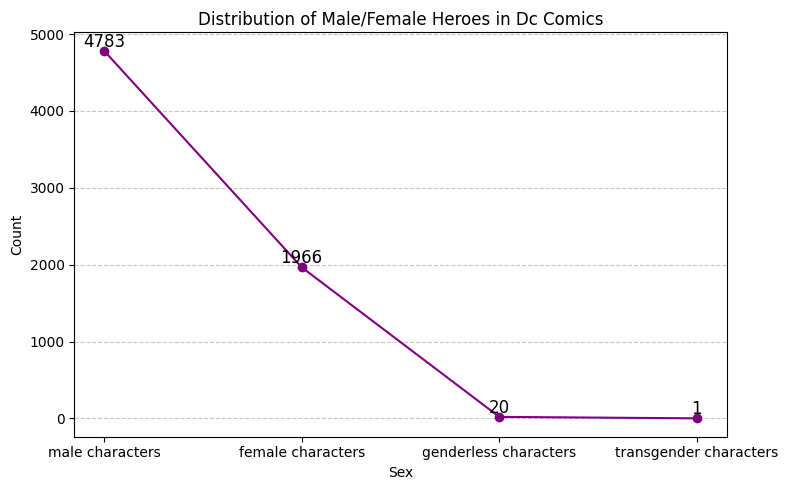

In [7]:
def hero_gender_distribution():
    publisher_choice = input("Enter 'DC Comics' or 'Marvel Comics': ").strip().lower()
    if publisher_choice == "dc comics":
        table_name = "DCHeroes"
    elif publisher_choice == "marvel comics":
        table_name = "MarvelHeroes"
    else:
        print("Invalid choice. Please enter 'DC Comics' or 'Marvel Comics'.")
        hero_gender_distribution()
        return

    # Connect to your SQLite database
    conn = sqlite3.connect('Hero.db')

    # Query for all heroes' sex
    query = f"SELECT sex FROM {table_name}"
    df = pd.read_sql(query, conn)
    conn.close()

    # Count the number of each sex
    sex_counts = df['sex'].value_counts()
    print("Count for each sex category:")
    print(sex_counts)

    # Horizontal bar chart
    plt.figure(figsize=(8, 5))
    plt.plot(sex_counts.index, sex_counts.values, marker='o', linestyle='-', color='purple')
    plt.xlabel('Sex')
    plt.ylabel('Count')
    plt.title(f'Distribution of Male/Female Heroes in {publisher_choice.title()}')
    for i, v in enumerate(sex_counts.values):
        plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Call the function
hero_gender_distribution()

The below code is to create a Function to give the user the choice of which Publisher they want to use in order to see how many heroes are deceased by Publisher and Gender.

Deceased hero counts by sex for DC Comics:
sex
male characters           1271
female characters          392
genderless characters        5
transgender characters       1
Name: count, dtype: int64


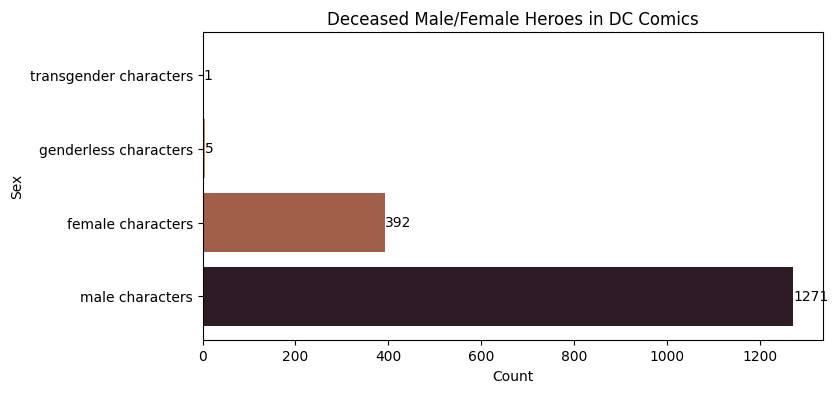

In [48]:
def deceased_hero_gender_count():
    publisher = input("Enter 'DC Comics' or 'Marvel Comics': ").strip()
    # Choose the correct table based on user input
    if publisher.lower() == "dc comics":
        table_name = "DCHeroes"
    elif publisher.lower() == "marvel comics":
        table_name = "MarvelHeroes"
    else:
        print("Invalid publisher. Use 'DC Comics' or 'Marvel Comics'.")
        deceased_hero_gender_count()
        return

    # Connect to the database
    conn = sqlite3.connect('Hero.db')
    # Query for deceased heroes (living or deceased characters') and their sex
    query = f"SELECT sex FROM {table_name} WHERE alive='deceased characters'"
    df = pd.read_sql(query, conn)
    conn.close()

    # Count the number of each sex
    sex_counts = df['sex'].value_counts()
    print(f"Deceased hero counts by sex for {publisher}:")
    print(sex_counts)

    # Horizontal bar chart
    plt.figure(figsize=(8, 4))
    plt.barh(sex_counts.index, sex_counts.values, color=['#2F1B25', '#A15E49', '#CA895F', '#E3D26F'])
    plt.xlabel('Count')
    plt.ylabel('Sex')
    plt.title(f'Deceased Male/Female Heroes in {publisher}')
    for i, v in enumerate(sex_counts.values):
        plt.text(v + 1, i, str(v), va='center')
    plt.show()

# Call the function
deceased_hero_gender_count()

The below code will join the selected Publisher dataset with the superheroespowers dataset to display each heroes powers along with other stats. (Using SQLite tables for this functionality).

In [9]:
def join_publisher_with_powers_and_display():
    publisher = input("Enter 'DC Comics' or 'Marvel Comics': ").strip()
    # Choose the correct table based on user input
    if publisher.lower() == "dc comics":
        table_name = "DCHeroes"
    elif publisher.lower() == "marvel comics":
        table_name = "MarvelHeroes"
    else:
        print("Invalid publisher. Use 'DC Comics' or 'Marvel Comics'.")
        join_publisher_with_powers_and_display()
        return

      # Connect to the database
    conn = sqlite3.connect('Hero.db')

    # Perform SQL JOIN on UPPERCASE name fields and drop nulls after reading
    query = f"""
        SELECT h.name, h.identity, h.align, h.eye, h.hair, h.sex, h.alive, p.Alignment, p.Creator, p.gender, p.Hair_color, p.name, p.Occupation, p.Super_powers
        FROM {table_name} h
        JOIN SuperHeroesPowers p
        ON UPPER(h.name) = UPPER(p.Name)
        WHERE p.Creator like '{publisher}'
    """
    merged_df = pd.read_sql(query, conn)
    conn.close()

    # Drop rows with any null values
    merged_df = merged_df.dropna()

    # Display the results
    print(f"Merged data for {publisher}:")
    display(merged_df)

# Calling the function
join_publisher_with_powers_and_display()

Merged data for DC Comics:


,name,identity,align,eye,hair,sex,alive,Alignment,Creator,Gender,Hair_color,Name,Occupation,Super_powers
0,stephanie brown,secret identity,good characters,blue eyes,blond hair,female characters,living characters,Good,DC Comics,Female,Blond,Stephanie Brown,Vigilante,"Adaptation,Agility,Dexterity,Durability,Gadget..."
1,stephanie brown,secret identity,good characters,blue eyes,blond hair,female characters,living characters,Good,DC Comics,Female,Blond,Stephanie Brown,Vigilante,"Adaptation,Agility,Dexterity,Durability,Gadget..."
9,artemis of bana-mighdall,public identity,good characters,green eyes,red hair,female characters,living characters,Good,DC Comics,Female,Red,Artemis Of Bana-Mighdall,"Minister of Defense, Chancellor of Themyscira,...","Agility,Intelligence,Marksmanship,Master Marti..."
10,artemis of bana-mighdall,public identity,good characters,green eyes,red hair,female characters,living characters,Good,DC Comics,Female,Red,Artemis Of Bana-Mighdall,"Minister of Defense, Chancellor of Themyscira,...","Agility,Intelligence,Marksmanship,Master Marti..."
13,albert pratt,secret identity,good characters,blue eyes,red hair,male characters,deceased characters,Good,DC Comics,Male,Red,Albert Pratt,"Adventurer, Retired Professor of Nuclear Physics","Durability,Intelligence,Stamina,Super Speed,Su..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,kara zor-el,secret identity,good characters,blue eyes,blond hair,female characters,living characters,Good,DC Comics,Female,Blond,Kara Zor-El,"Student, Superhero.","Agility,Durability,Endurance,Energy Absorption..."
1933,kal-el,public identity,good characters,gold eyes,gold hair,male characters,living characters,Good,DC Comics,Male,Black,Kal-El,Superhero,"Acid Resistants,Agility,Aura,Bullet Time,Cold ..."
1934,kal-el,public identity,good characters,gold eyes,gold hair,male characters,living characters,Neutral,DC Comics,Male,Black,Kal-El,"Reporter for the Daily Planet and novelist, Ad...","Accelerated Development,Accelerated Healing,Ad..."
1940,harvey dent,public identity,bad characters,blue eyes,brown hair,male characters,living characters,Neutral,DC Comics,Male,Blond,Harvey Dent,"District Attorney, Mad Man","Intelligence,Insanity"


Here’s a function that lets the user select a publisher and displays the gender distribution as a pie chart, ensuring all values and labels are visible:

Count for each sex category:
sex
male characters           4783
female characters         1966
genderless characters       20
transgender characters       1
Name: count, dtype: int64


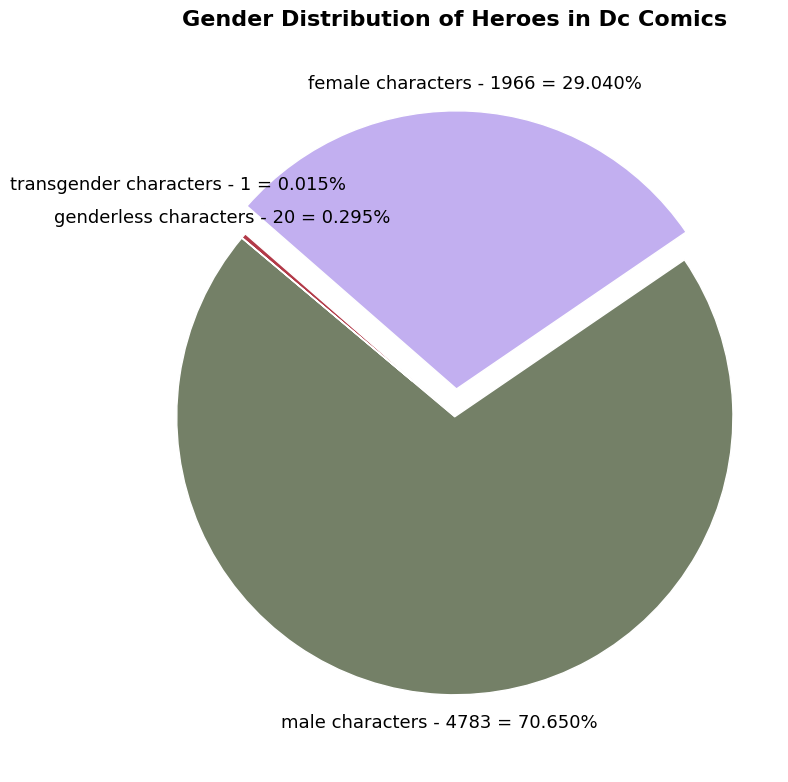

In [10]:
def hero_gender_exploded_pie_chart():
    publisher_choice = input("Enter 'DC Comics' or 'Marvel Comics': ").strip().lower()
    if publisher_choice == "dc comics":
        table_name = "DCHeroes"
    elif publisher_choice == "marvel comics":
        table_name = "MarvelHeroes"
    else:
        print("Invalid choice. Please enter 'DC Comics' or 'Marvel Comics'.")
        return

    conn = sqlite3.connect('Hero.db')
    query = f"SELECT sex FROM {table_name}"
    df = pd.read_sql(query, conn)
    conn.close()


    df = df.dropna(subset=['sex'])
    df = df[df['sex'].str.lower() != 'unknown']
    sex_counts = df['sex'].value_counts()
    print("Count for each sex category:")
    print(sex_counts)

    total = sex_counts.sum()
    labels = [f"{label} - {count} = {count/total:.3%}" for label, count in zip(sex_counts.index, sex_counts.values)]

    # Dynamically set explode values for 4 or 8 slices
    n = len(sex_counts)
    if n == 4:
        explode = (0, 0.1, 0, 0.2)
    elif n == 8:
        explode = (0, 0.05, 0, 0.5, 0.3, 0.7, 0.9, 1.1)
    else:
        explode = tuple([0.1 if i == 1 else 0 for i in range(n)])  

    plt.figure(figsize=(8, 8))
    patches, texts = plt.pie(
        sex_counts.values,
        colors=['#748067', '#C2AFF0', '#B23A48', '#5DA271', 
                 '#CC99FF', '#FF66B3', '#99FFCC', '#CCFF99'],
        labels=labels,
        explode=explode,
        startangle=140,
        textprops={'fontsize': 13, 'ha': 'center'},
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )
    plt.title(f"Gender Distribution of Heroes in {publisher_choice.title()}", fontsize=16, weight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Call the function
hero_gender_exploded_pie_chart()

Vertical Bar Chart showing how many Comic Book Characters were created every 20 years by Publisher.

C:\Users\charl\AppData\Local\Temp\ipykernel_15228\2126145273.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Publisher', 'year_bin']).size().reset_index(name='count')
C:\Users\charl\AppData\Local\Temp\ipykernel_15228\2126145273.py:28: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = grouped.pivot_table(index='year_bin', columns='Publisher', values='count', fill_value=0)


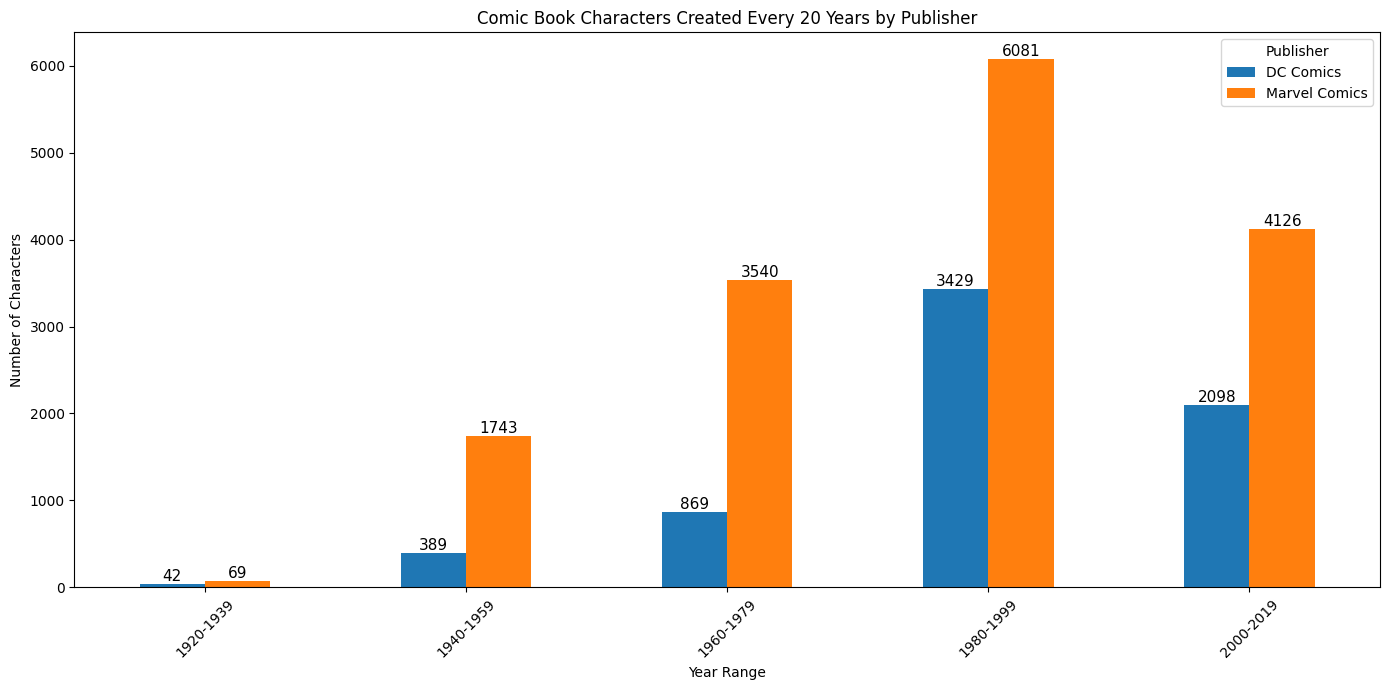

In [43]:
conn = sqlite3.connect('Hero.db')
dc = pd.read_sql("SELECT name, year FROM DCHeroes", conn)
marvel = pd.read_sql("SELECT name, year FROM MarvelHeroes", conn)
conn.close()

# Add publisher column
dc['Publisher'] = 'DC Comics'
marvel['Publisher'] = 'Marvel Comics'

# Convert year to int, fill NaN with 0, drop 0 years
for df in [dc, marvel]:
    df['year'] = pd.to_numeric(df['year'], errors='coerce').fillna(0).astype(int)
    df.drop(df[df['year'] == 0].index, inplace=True)

# Combine for plotting
df = pd.concat([dc, marvel], ignore_index=True)

if df.empty:
    print("No valid year data to plot.")
else:
    min_year = int(df['year'].min())
    max_year = int(df['year'].max())
    bins = list(range((min_year // 20) * 20, ((max_year // 20) + 2) * 20, 20))
    labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
    df['year_bin'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

    grouped = df.groupby(['Publisher', 'year_bin']).size().reset_index(name='count')
    pivot = grouped.pivot_table(index='year_bin', columns='Publisher', values='count', fill_value=0)

    pivot.plot(kind='bar', figsize=(14, 7))

    # Add total number to the top of each bar
    for container in plt.gca().containers:
        plt.gca().bar_label(container, label_type='edge', fontsize=11)

    plt.title('Comic Book Characters Created Every 20 Years by Publisher')
    plt.xlabel('Year Range')
    plt.ylabel('Number of Characters')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Vertical Bar Chart showing how many Comic Book Characters were created every 20 years by Publisher and Gender.

C:\Users\charl\AppData\Local\Temp\ipykernel_15228\1603551207.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['year_bin', 'Publisher', 'sex']).size().reset_index(name='count')
C:\Users\charl\AppData\Local\Temp\ipykernel_15228\1603551207.py:31: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = grouped.pivot_table(index='year_bin', columns=['Publisher', 'sex'], values='count')


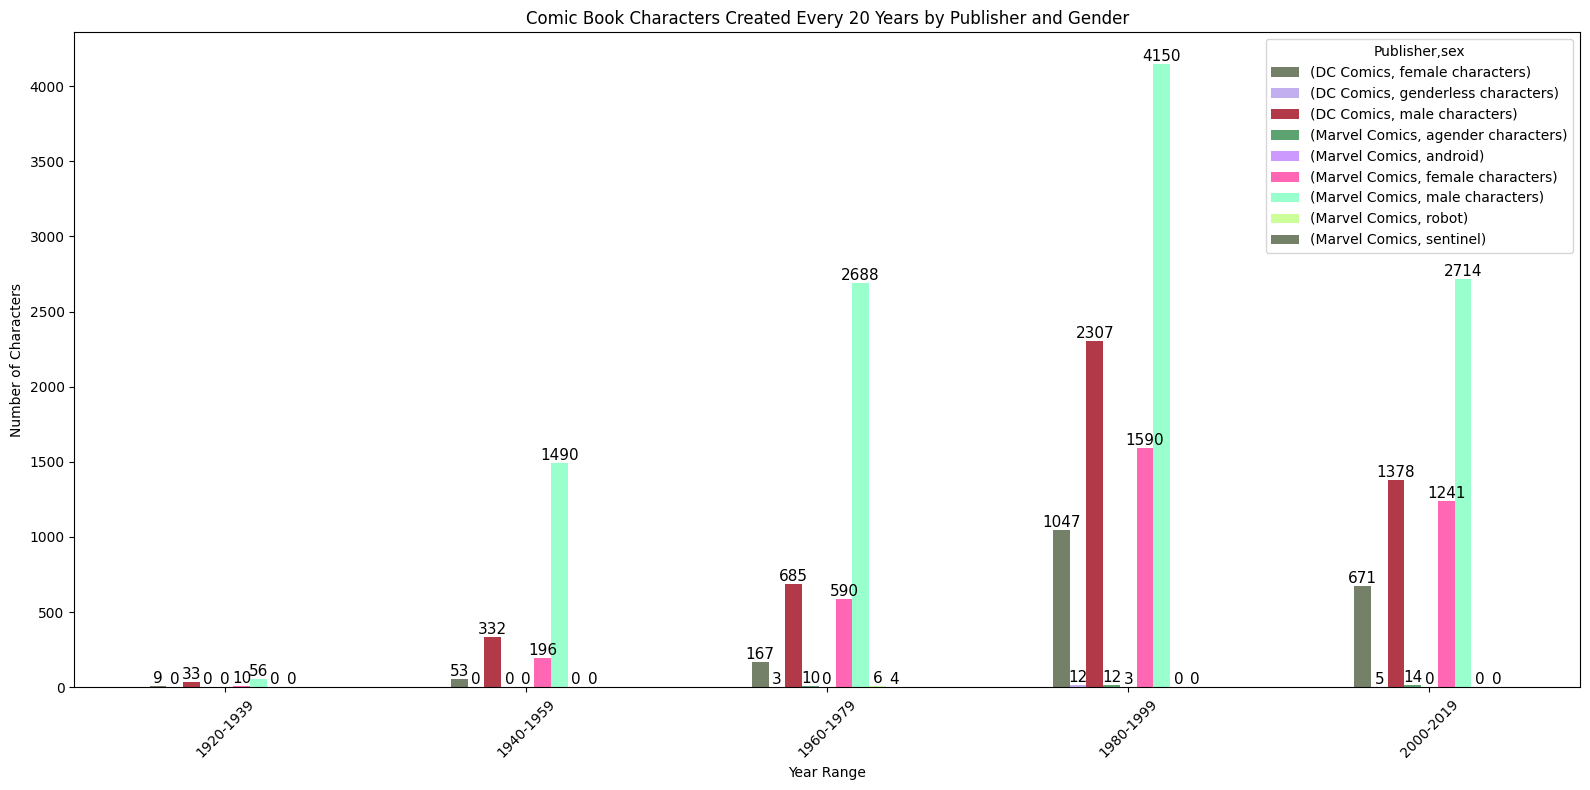

In [51]:
conn = sqlite3.connect('Hero.db')
dc = pd.read_sql("SELECT name, year, sex FROM DCHeroes", conn)
marvel = pd.read_sql("SELECT name, year, sex FROM MarvelHeroes", conn)
conn.close()

# Add publisher column
dc['Publisher'] = 'DC Comics'
marvel['Publisher'] = 'Marvel Comics'

# Convert year to int, drop 0 years, filter out unknown/null gender
for df in [dc, marvel]:
    df['year'] = pd.to_numeric(df['year'], errors='coerce').fillna(0).astype(int)
    df.drop(df[df['year'] == 0].index, inplace=True)
    df.drop(df[df['sex'].isna() | (df['sex'].str.lower() == 'unknown')].index, inplace=True)

# Combine for plotting
df = pd.concat([dc, marvel], ignore_index=True)

if df.empty:
    print("No valid year data to plot.")
else:
    min_year = int(df['year'].min())
    max_year = int(df['year'].max())
    bins = list(range((min_year // 20) * 20, ((max_year // 20) + 2) * 20, 20))
    labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
    df['year_bin'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

    grouped = df.groupby(['year_bin', 'Publisher', 'sex']).size().reset_index(name='count')
    # Remove gender from bucket if count is 0
    grouped = grouped[grouped['count'] > 1]
    pivot = grouped.pivot_table(index='year_bin', columns=['Publisher', 'sex'], values='count')

    colors=['#748067', '#C2AFF0', '#B23A48', '#5DA271', 
                 '#CC99FF', '#FF66B3', '#99FFCC', '#CCFF99']
    ax = pivot.plot(kind='bar', stacked=False, figsize=(16, 8), color=colors)

    for container in ax.containers:
        labels = [int(v) if not np.isnan(v) else "" for v in container.datavalues]
        ax.bar_label(container, labels=labels, label_type='edge', fontsize=11)

    plt.title('Comic Book Characters Created Every 20 Years by Publisher and Gender')
    plt.xlabel('Year Range')
    plt.ylabel('Number of Characters')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()